# Random Forest/Levenshtein

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#For data
import pandas as pd

#For modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree

#For String distances
import Levenshtein as lev
import textdistance as td

## Data importation

In [3]:
communes_dataframe = pd.read_csv("COMMUNES.csv", delimiter=";")
communes_dataframe

,insee,nom,altitude,code_postal,longitude,latitude,pop99,surface,departement,region,indicatif
0,1001,L'Abergement-Clémenciat,257.0,1400,0.085856,0.805508,728,15.70,1,RA,4
1,1002,L'Abergement-de-Varey,367.0,1640,0.094665,0.802987,168,9.14,1,RA,4
2,1004,Ambérieu-en-Bugey,247.0,1500,0.093356,0.802085,11436,24.51,1,RA,4
3,1005,Ambérieux-en-Dombes,293.0,1330,0.085594,0.802784,1408,16.06,1,RA,4
4,1006,Ambléon,400.0,1300,0.097777,0.798493,86,6.03,1,RA,4
5,1007,Ambronay,250.0,1500,0.093540,0.802992,2146,33.64,1,RA,4
6,1008,Ambutrix,270.0,1500,0.093239,0.801795,586,5.19,1,RA,4
7,1009,Andert-et-Condon,330.0,1300,0.098718,0.799283,275,6.95,1,RA,4
8,1010,Anglefort,250.0,1350,0.101384,0.801315,769,29.49,1,RA,4
9,1011,Apremont,900.0,1100,0.098849,0.806517,329,15.09,1,RA,4


In [4]:
ALL_COMMUNES=communes_dataframe.values
COMMUNES, TEST_COMMUNES = train_test_split(ALL_COMMUNES, test_size=0.099, random_state=10)

## Creation of learning datasets

### Medians/region

In [5]:
def medians_per_region_lev(INPUT=COMMUNES,SET=True,Improved=10):
    
    OUTPUT=[]
    regions=set(INPUT[:,9])
    
    for i in regions:
        
        print('current region ',i)
        tmp=INPUT[where(INPUT[:,9]==i)]
        tmp2=tmp[:,1]
        
        if SET: median=lev.setmedian(tmp2)
        else: median=lev.median(tmp2)
            
        print('The median is ',median)
        
        
        if Improved>0:
            improve_median=lev.median_improve(median,tmp2)
            for j in range(10):
                improve_median=lev.median_improve(improve_median,tmp2)
            print('The improved median is ',improve_median)
            median=improve_median
        
        OUTPUT.append(median)
        print('\n','--------------')
        
    return OUTPUT

In [6]:
###############
##Creation of medians##
################

medians=medians_per_region_lev(COMMUNES,False)

current region  PL
The median is  Sainte
The improved median is  Sain-re

 --------------
current region  IF
The median is  Caine
The improved median is  aine-re

 --------------
current region  PC
The median is  Sainte
The improved median is  Sainae

 --------------
current region  NP
The median is  Baerine
The improved median is  aerine

 --------------
current region  AL
The median is  Sierenhei
The improved median is  iesheie

 --------------
current region  FC
The median is  Caoenre
The improved median is  ae-ane

 --------------
current region  BN
The median is  Saine
The improved median is  Saneil-e

 --------------
current region  BR
The median is  Lainoe
The improved median is  Lainae

 --------------
current region  HN
The median is  Sainet-ille
The improved median is  aineille

 --------------
current region  LR
The median is  Sainea
The improved median is  Saines

 --------------
current region  CA
The median is  Cairne
The improved median is  eai-re

 --------------
curren

It won't work:
Some medians are the same and they all seem to be the same...
Let's use a new metric.

In [5]:
import city_distances as cd

In [6]:
dst=cd.strSimilarity(td.levenshtein,COMMUNES)

current region  BR
The median is  Trévérien

 --------------
current region  BO
The median is  Champlecy

 --------------
current region  CE
The median is  Montgivray

 --------------
current region  PI
The median is  Huppy

 --------------
current region  PC
The median is  Brigueuil

 --------------
current region  HN
The median is  Les_Damps

 --------------
current region  PA
The median is  Flayosc

 --------------
current region  AQ
The median is  Caudecoste

 --------------
current region  BN
The median is  Digulleville

 --------------
current region  MP
The median is  Le_Riols

 --------------
current region  LR
The median is  Luc

 --------------
current region  IF
The median is  Reuil-en-Brie

 --------------
current region  AL
The median is  Weitbruch

 --------------
current region  PL
The median is  Vieillevigne

 --------------
current region  FC
The median is  Pontarlier

 --------------
current region  RA
The median is  Réauville

 --------------
current region  NP
The m

## Distances betwenn cities/median

In [7]:
X_APP=dst.distances_data()
X_TEST=dst.distance_data(TEST_COMMUNES)
X_TEST[:5,:5]

array([[10, 11,  8, 10,  9],
       [26, 25, 27, 28, 24],
       [19, 19, 19, 20, 17],
       [ 8,  8,  9,  5,  8],
       [13, 15, 16, 16, 13]])

In [8]:
Y_APP=COMMUNES[:,9]
Y_TEST=TEST_COMMUNES[:,9]

## First random forest

In [11]:
small_rf=RandomForestClassifier(n_estimators=6,max_depth=2)
small_rf.fit(X_APP,Y_APP)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

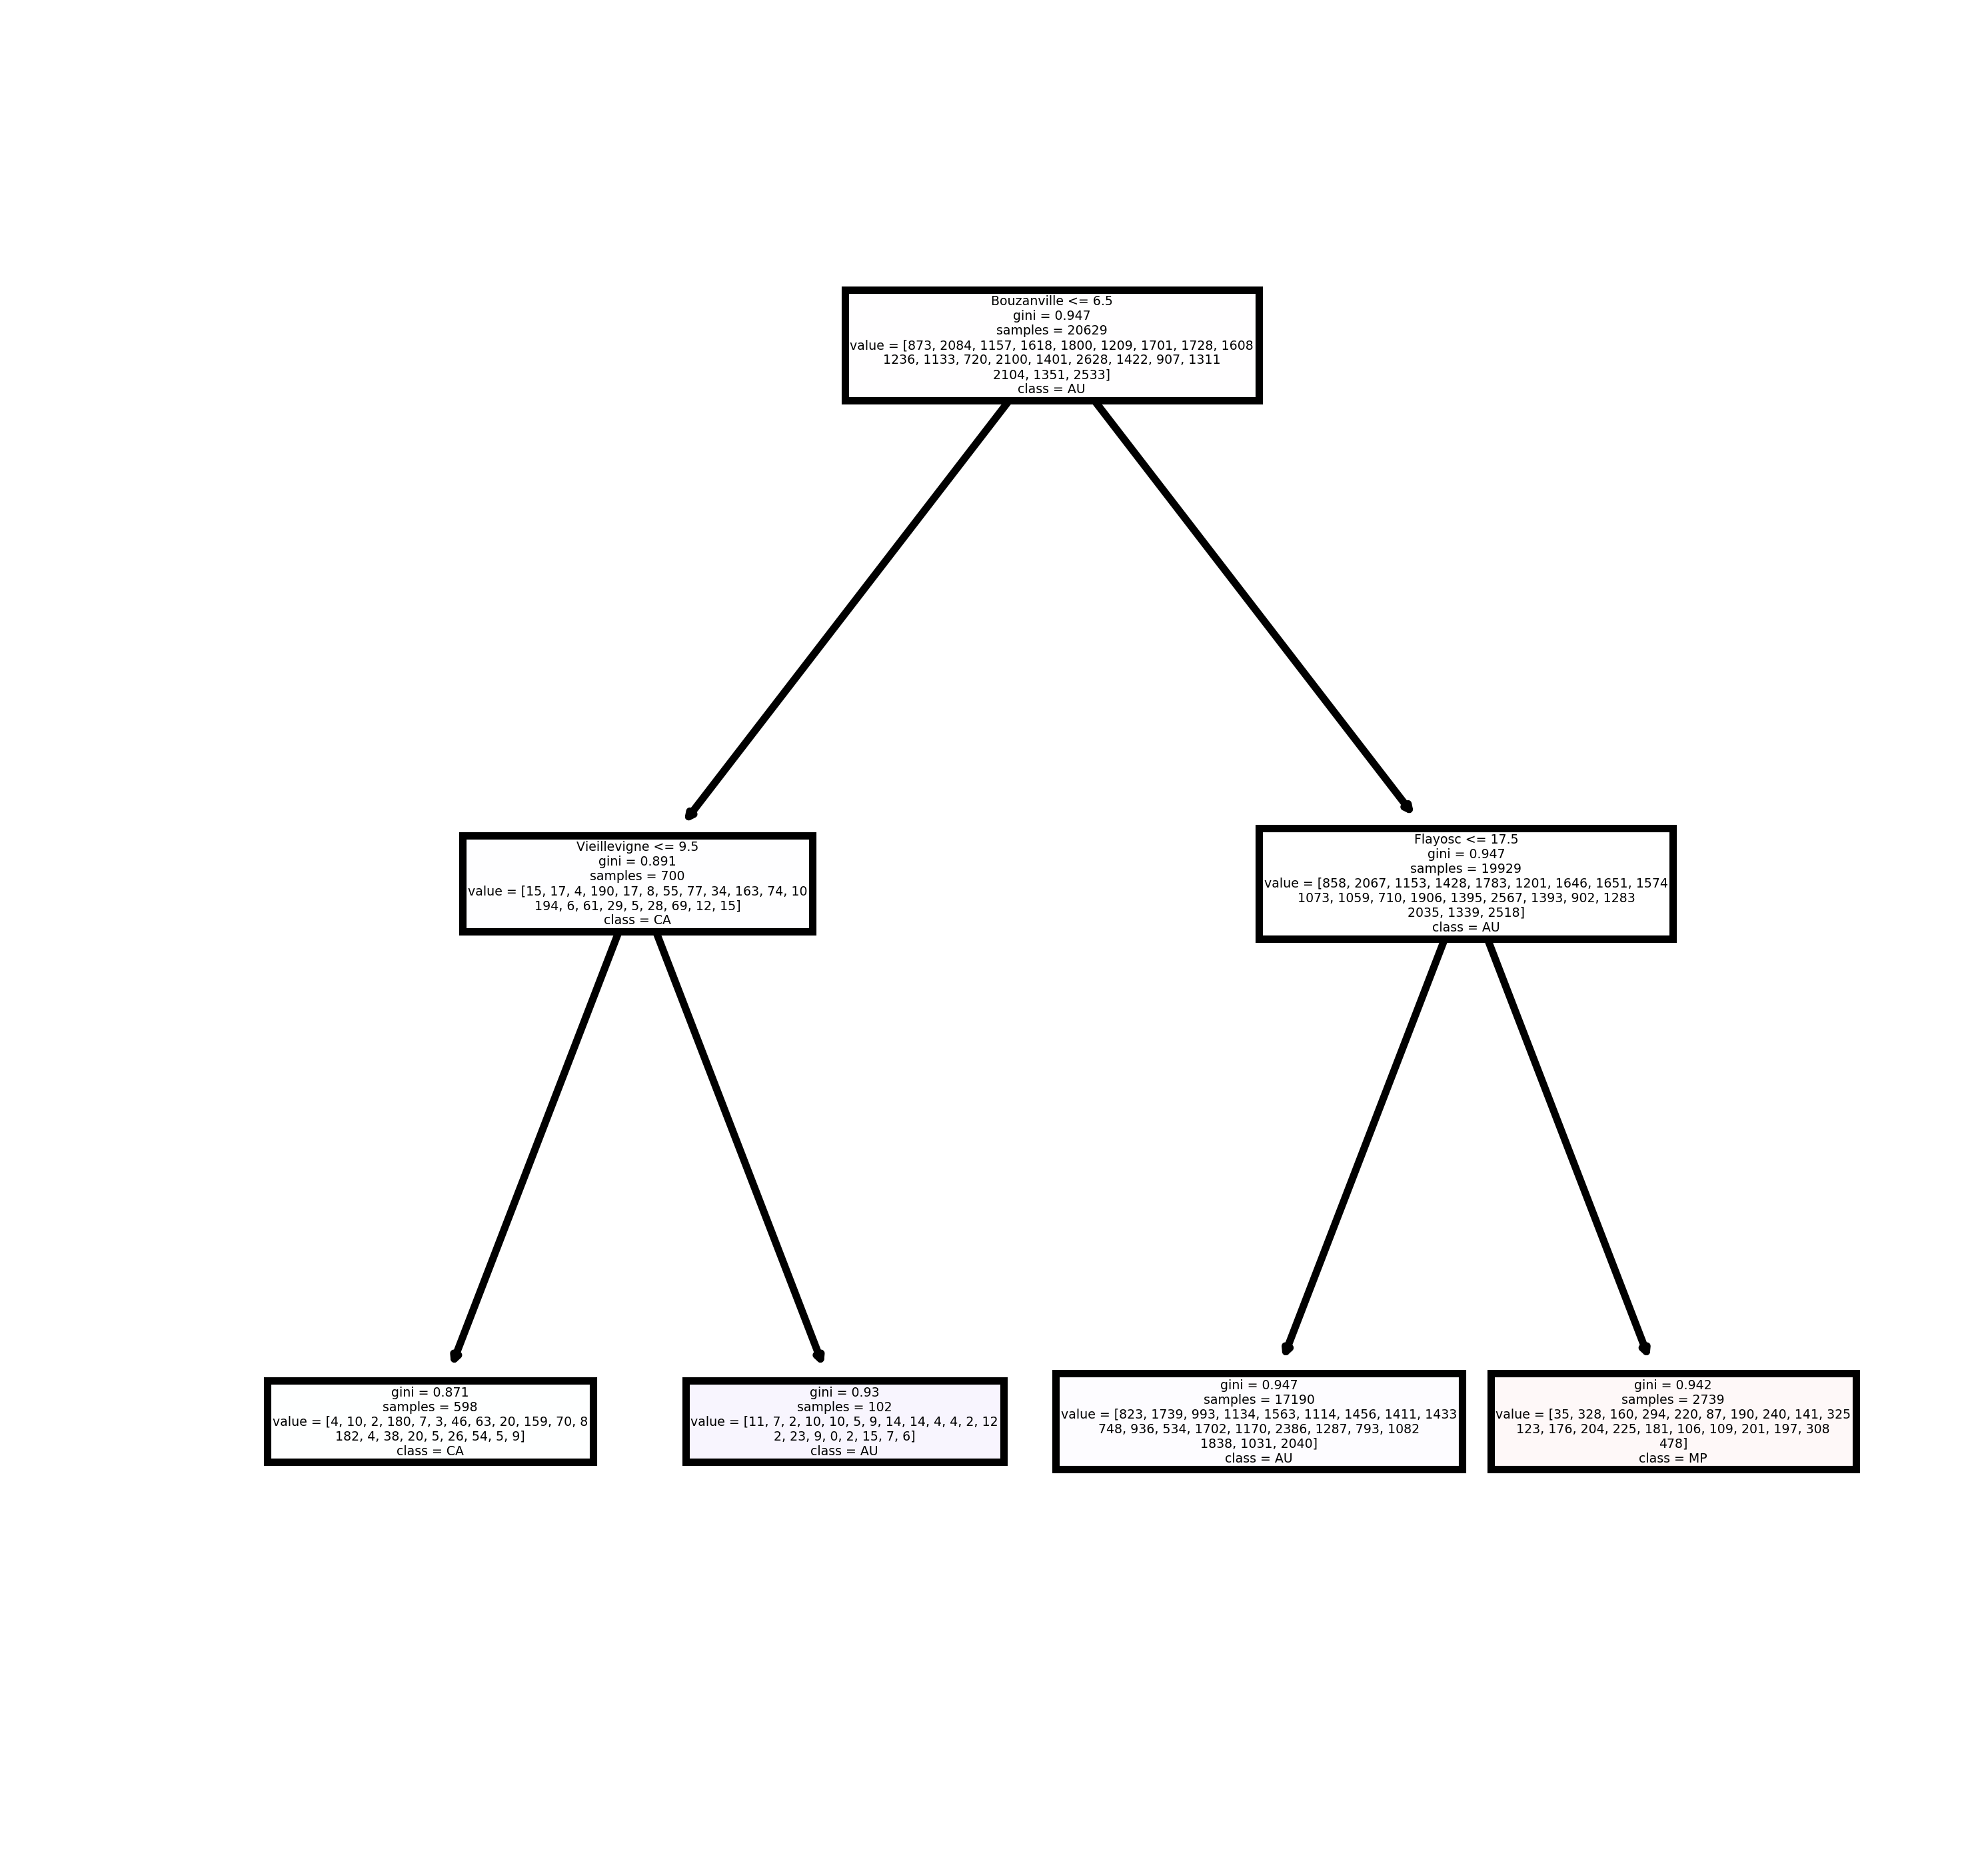

In [16]:
###############
#Printing 1 reduced tree
################

fn=dst.medians
cn=list(set(Y_APP))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(small_rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_lev_individualtree.png')

## Random Forest X-validation

In [17]:
############################
########Set the grid########
############################

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =10, stop = 1000, num = 10)]# number of features at every split

# max depth
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]           
max_depth.append(None)

# create random grid
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth}

In [20]:
############################
#####Creation of the RF#####
############################

rfc = RandomForestClassifier()

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2)

# Fit the model
rfc_random.fit(X_APP, Y_APP)
rfc_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=120, max_depth=78 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... n_estimators=120, max_depth=78, total=   9.9s
[CV] n_estimators=120, max_depth=78 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] ................... n_estimators=120, max_depth=78, total=  12.3s
[CV] n_estimators=120, max_depth=78 ..................................
[CV] ................... n_estimators=120, max_depth=78, total=  11.2s
[CV] n_estimators=780, max_depth=56 ..................................
[CV] ................... n_estimators=780, max_depth=56, total= 1.2min
[CV] n_estimators=780, max_depth=56 ..................................
[CV] ................... n_estimators=780, max_depth=56, total= 1.1min
[CV] n_estimators=780, max_depth=56 ..................................
[CV] ................... n_estimators=780, max_depth=56, total= 1.1min
[CV] n_estimators=670, max_depth=None ................................
[CV] ................. n_estimators=670, max_depth=None, total=  54.4s
[CV] n_estimators=670, max_depth=None ................................
[CV] ................. n_estimators=670, max_depth=None, total=  53.9s
[CV] n_estimators=670, max_depth=None ................................
[CV] .

[CV] ................... n_estimators=670, max_depth=12, total=  31.5s
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  48.7s
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  44.2s
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  52.9s
[CV] n_estimators=560, max_depth=23 ..................................
[CV] ................... n_estimators=560, max_depth=23, total=  55.5s
[CV] n_estimators=560, max_depth=23 ..................................
[CV] ................... n_estimators=560, max_depth=23, total=  49.2s
[CV] n_estimators=560, max_depth=23 ..................................
[CV] ................... n_estimators=560, max_depth=23, total=  52.3s
[CV] n_estimators=670, max_depth=45 ..................................
[CV] .

[CV] ................... n_estimators=450, max_depth=45, total=  37.6s
[CV] n_estimators=450, max_depth=45 ..................................
[CV] ................... n_estimators=450, max_depth=45, total=  35.4s
[CV] n_estimators=450, max_depth=45 ..................................
[CV] ................... n_estimators=450, max_depth=45, total=  35.2s
[CV] n_estimators=1000, max_depth=45 .................................
[CV] .................. n_estimators=1000, max_depth=45, total= 2.1min
[CV] n_estimators=1000, max_depth=45 .................................
[CV] .................. n_estimators=1000, max_depth=45, total= 1.7min
[CV] n_estimators=1000, max_depth=45 .................................
[CV] .................. n_estimators=1000, max_depth=45, total= 1.5min
[CV] n_estimators=340, max_depth=34 ..................................
[CV] ................... n_estimators=340, max_depth=34, total=  30.9s
[CV] n_estimators=340, max_depth=34 ..................................
[CV] .

[CV] ................. n_estimators=560, max_depth=None, total=  44.8s
[CV] n_estimators=560, max_depth=None ................................
[CV] ................. n_estimators=560, max_depth=None, total=  44.5s
[CV] n_estimators=670, max_depth=1 ...................................
[CV] .................... n_estimators=670, max_depth=1, total=   8.8s
[CV] n_estimators=670, max_depth=1 ...................................
[CV] .................... n_estimators=670, max_depth=1, total=  10.3s
[CV] n_estimators=670, max_depth=1 ...................................
[CV] .................... n_estimators=670, max_depth=1, total=   9.1s
[CV] n_estimators=10, max_depth=67 ...................................
[CV] .................... n_estimators=10, max_depth=67, total=   0.7s
[CV] n_estimators=10, max_depth=67 ...................................
[CV] .................... n_estimators=10, max_depth=67, total=   0.8s
[CV] n_estimators=10, max_depth=67 ...................................
[CV] .

[CV] ................... n_estimators=450, max_depth=12, total=  16.4s
[CV] n_estimators=450, max_depth=78 ..................................
[CV] ................... n_estimators=450, max_depth=78, total=  35.6s
[CV] n_estimators=450, max_depth=78 ..................................
[CV] ................... n_estimators=450, max_depth=78, total=  36.0s
[CV] n_estimators=450, max_depth=78 ..................................
[CV] ................... n_estimators=450, max_depth=78, total=  37.3s
[CV] n_estimators=780, max_depth=34 ..................................
[CV] ................... n_estimators=780, max_depth=34, total= 1.1min
[CV] n_estimators=780, max_depth=34 ..................................
[CV] ................... n_estimators=780, max_depth=34, total= 1.0min
[CV] n_estimators=780, max_depth=34 ..................................
[CV] ................... n_estimators=780, max_depth=34, total= 1.0min
[CV] n_estimators=340, max_depth=45 ..................................
[CV] .

[CV] .................... n_estimators=340, max_depth=1, total=   4.1s
[CV] n_estimators=340, max_depth=1 ...................................
[CV] .................... n_estimators=340, max_depth=1, total=   3.6s
[CV] n_estimators=340, max_depth=1 ...................................
[CV] .................... n_estimators=340, max_depth=1, total=   3.6s
[CV] n_estimators=230, max_depth=45 ..................................
[CV] ................... n_estimators=230, max_depth=45, total=  16.8s
[CV] n_estimators=230, max_depth=45 ..................................
[CV] ................... n_estimators=230, max_depth=45, total=  15.5s
[CV] n_estimators=230, max_depth=45 ..................................
[CV] ................... n_estimators=230, max_depth=45, total=  15.6s
[CV] n_estimators=10, max_depth=12 ...................................
[CV] .................... n_estimators=10, max_depth=12, total=   0.4s
[CV] n_estimators=10, max_depth=12 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 195.2min finished


{'max_depth': 23, 'n_estimators': 1000}

Best parameters:

    max_depth:23
    
    n_estimators:1000

In [10]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=23)
rf.fit(X_APP,Y_APP)

rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Performances

In [14]:
Y_pred=rf.predict(X_TEST)

print(classification_report(Y_TEST, Y_pred))

              precision    recall  f1-score   support

          AL       0.34      0.48      0.40        82
          AQ       0.14      0.13      0.13       238
          AU       0.09      0.05      0.06       122
          BN       0.10      0.08      0.09       186
          BO       0.11      0.11      0.11       224
          BR       0.28      0.23      0.25       116
          CA       0.14      0.13      0.13       205
          CE       0.14      0.10      0.12       177
          FC       0.18      0.15      0.16       184
          HN       0.22      0.19      0.20       143
          IF       0.12      0.07      0.09       131
          LI       0.04      0.01      0.02        71
          LO       0.19      0.23      0.21       218
          LR       0.13      0.06      0.08       147
          MP       0.21      0.35      0.26       324
          NP       0.17      0.13      0.15       156
          PA       0.07      0.03      0.05        86
          PC       0.12    

## Importances

Text(0.5,1,'Variable Importances')

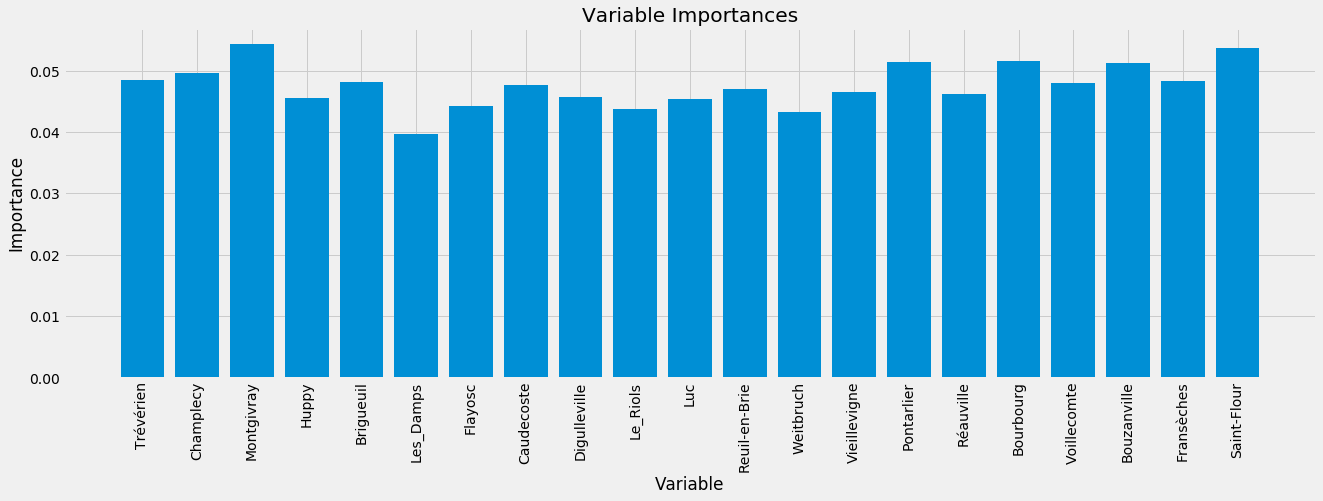

In [16]:
################
#Variable importance
###############

# Get numerical feature importances
importances = list(rf.feature_importances_)

# Set the style
style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

figure(figsize=(20,6))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, dst.medians, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')